pixar movies analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# import dataset
pixar_movies = pd.read_csv("pixar_movies.csv")

# determine dimensions of the datatable
row_number = pixar_movies.shape[0]
column_number = pixar_movies.shape[1]

# print out the entire table
print(pixar_movies.head(row_number))

    Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        39         6.3   
12           2012                Brave     100        78        

In [2]:
# print out all the data types in the table
print(pixar_movies.dtypes)

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object


In [3]:
# create summary statistics
print(pixar_movies.describe())

       Year Released      Length    RT Score  IMDB Score  Metacritic Score  \
count      15.000000   15.000000   15.000000   15.000000         15.000000   
mean     2006.066667  101.533333   89.333333    7.846667         82.800000   
std         5.933761    9.927355   16.451950    0.655599         12.119642   
min      1995.000000   81.000000   39.000000    6.300000         57.000000   
25%      2002.000000   96.000000   85.000000    7.300000         75.000000   
50%      2007.000000  102.000000   96.000000    8.000000         88.000000   
75%      2010.500000  109.000000   98.500000    8.300000         92.000000   
max      2015.000000  116.000000  100.000000    8.800000         96.000000   

       Opening Weekend  Worldwide Gross  Domestic Gross  \
count        15.000000        15.000000       15.000000   
mean         67.990667       612.486667      258.506667   
std          23.270468       190.193934       66.518284   
min          29.140000       362.000000      162.800000   
25

/usr/local/lib/python3.4/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [4]:
# get rid of the %-sign in the "Domestic %" and "International %" columns and convert
# their datatypes to float, use the series attribute str to apply the rstrip function to
# each row and strip the %-sign
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype(float)
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype(float)

# convert the "IMDB Score" column from a 10 point scale to a 100 point scale
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

# get rid of the rows containing NaN values
filtered_pixar = pixar_movies.dropna()

# set the "Movie" column containing the respective movie names as the index 
# for the dataframes
pixar_movies.set_index("Movie", inplace=True)
filtered_pixar.set_index("Movie", inplace=True)

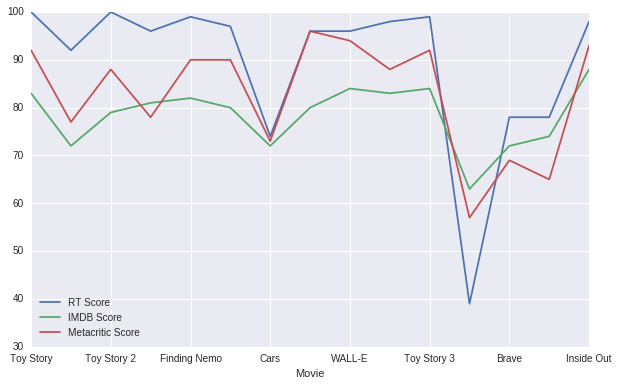

In [5]:
# dataframe containing only the different critics scores from all three providers
critics_reviews = pixar_movies[["RT Score", "IMDB Score", "Metacritic Score"]]

# plot all the reviews in a single line plot
critics_reviews.plot(figsize=(10, 6))

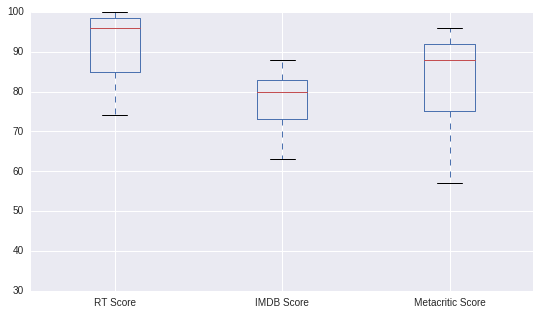

In [6]:
# plot the distribution of the reviews in a box plot
critics_reviews.plot(kind="box", figsize=(9, 5))

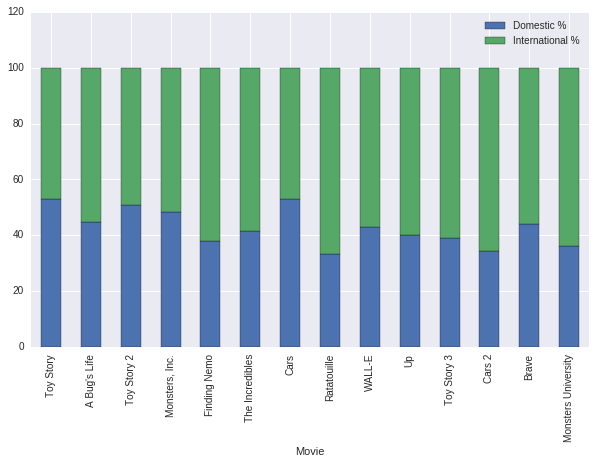

In [7]:
# create new dataframe containing only the percentage numbers of the total revenue made
# in the US and internationally
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]

# plot the numbers in a stacked bar plot
revenue_proportions.plot(kind="bar", stacked=True, figsize=(10, 6))

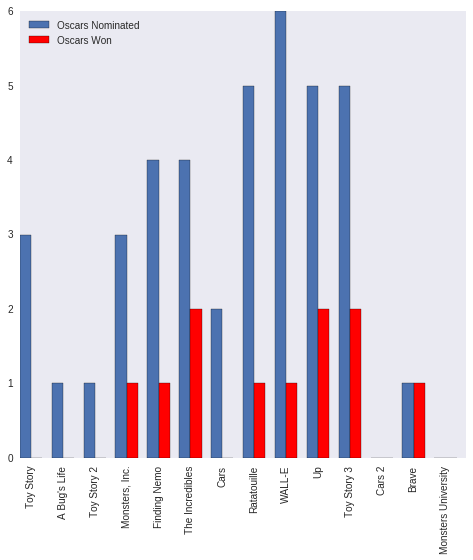

In [8]:
# create new dataframe containing only the number of oscars a movie was nominated for and
# the number it actually won
oscars_nominated_won = filtered_pixar[["Oscars Nominated", "Oscars Won"]]

# plot the data in a grouped bar plot for comparison
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

locs = np.arange(0, oscars_nominated_won.shape[0])
offset_locs = locs + 0.35

bar_1 = ax.bar(locs, oscars_nominated_won["Oscars Nominated"].tolist(), width=0.35)
bar_2 = ax.bar(offset_locs, oscars_nominated_won["Oscars Won"].tolist(), width=0.35, color="red")

ax.set_xticks(offset_locs) # align the x-axis labels between the two bars
ax.set_xticklabels(oscars_nominated_won.index.tolist(), rotation=90) # set x-axis tick labels
ax.legend((bar_1, bar_2), ("Oscars Nominated", "Oscars Won"), loc="upper left") # create legend
ax.grid() # turn on background grid